In [2920]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

In [2921]:
#Lettura dei file
training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2922]:
#Informazioni sui dati di training
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               215 non-null    int64  
 1   age                       215 non-null    float64
 2   anaemia                   215 non-null    int64  
 3   creatinine_phosphokinase  215 non-null    int64  
 4   diabetes                  215 non-null    int64  
 5   ejection_fraction         215 non-null    int64  
 6   high_blood_pressure       215 non-null    int64  
 7   platelets                 215 non-null    float64
 8   serum_creatinine          215 non-null    float64
 9   serum_sodium              215 non-null    int64  
 10  sex                       215 non-null    int64  
 11  smoking                   215 non-null    int64  
 12  time                      215 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 22.0 KB


In [2923]:
#Informazioni sui dati di test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               24 non-null     int64  
 1   age                       24 non-null     float64
 2   anaemia                   24 non-null     int64  
 3   creatinine_phosphokinase  24 non-null     int64  
 4   diabetes                  24 non-null     int64  
 5   ejection_fraction         24 non-null     int64  
 6   high_blood_pressure       24 non-null     int64  
 7   platelets                 24 non-null     float64
 8   serum_creatinine          24 non-null     float64
 9   serum_sodium              24 non-null     int64  
 10  sex                       24 non-null     int64  
 11  smoking                   24 non-null     int64  
 12  time                      24 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 2.6 KB


In [2924]:
#Trasformo i valori delle features age e platelets da float a int nel training set
colonne=["age", "platelets"]
for i in colonne:
    training[i]=training[i].astype('int64')
training.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,44,0,582,1,30,1,263358,1.60,130,1,1,244
1,0,80,0,898,0,25,0,149000,1.10,144,1,1,87
2,0,73,1,231,1,30,0,160000,1.18,142,1,1,180
3,0,45,1,130,0,35,0,174000,0.80,139,1,1,121
4,0,75,0,582,0,45,1,263358,1.18,137,1,0,87


In [2925]:
#Trasformo i valori delle features age e platelets da float a int nel training set
colonne=["age", "platelets"]
for i in colonne:
    test[i]=test[i].astype('int64')
test.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,65,1,52,0,25,1,276000,1.3,137,0,0,16
1,0,42,0,5209,0,30,0,226000,1.0,140,1,1,87
2,0,62,1,655,0,40,0,283000,0.7,133,0,0,233
3,1,60,0,68,0,20,0,119000,2.9,127,1,1,64
4,0,45,0,2413,0,38,0,140000,1.4,140,1,1,280


In [2926]:
#Effettuo il drop di eventuali elementi che hanno età < 0 
training = training.drop(training[ (training.age < 0)].index)
test = test.drop(test[(test.age < 0)].index)

[0.02180205 0.10514962 0.04838204 0.10783934 0.03455792 0.10061045
 0.03769755 0.10895216 0.10206722 0.09274914 0.04012696 0.03531286
 0.16475268]


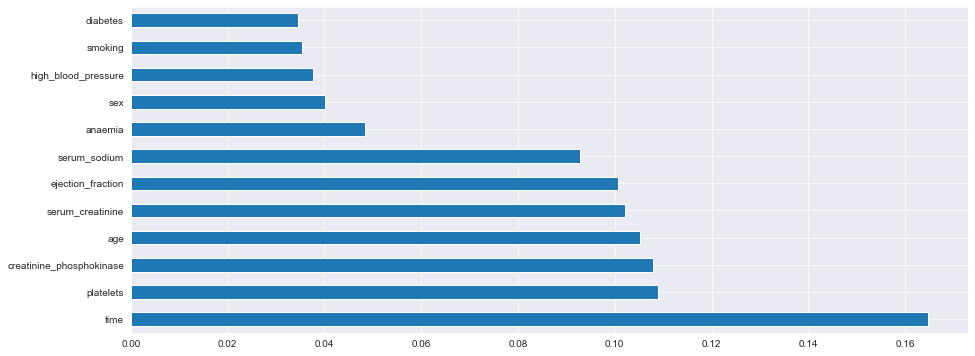

In [2927]:
# Feature Selection: mi mostra il grafico dell' importanza delle features

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = training.iloc[:, :13]
y = training.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

[0.04913043 0.09565217 0.0426087  0.10173913 0.05565217 0.08434783
 0.05782609 0.12       0.09391304 0.09956522 0.04695652 0.04130435
 0.11130435]


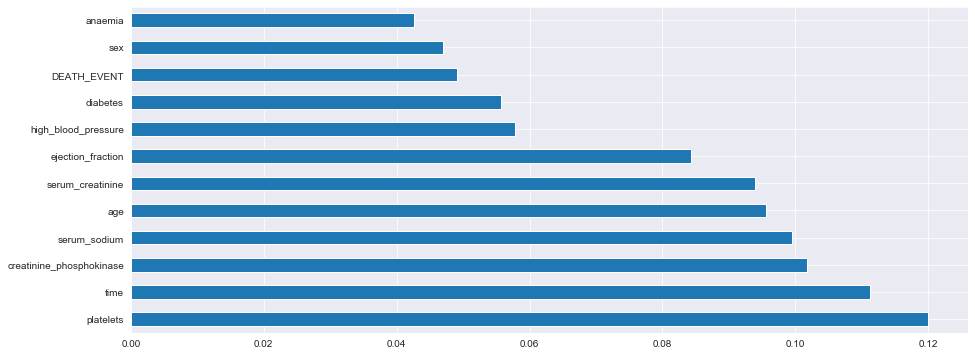

In [2928]:
# Feature Selection: mi mostra il grafico dell' importanza delle features


plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

X = test.iloc[:, :13]
y = test.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [2929]:
training.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,44,0,582,1,30,1,263358,1.60,130,1,1,244
1,0,80,0,898,0,25,0,149000,1.10,144,1,1,87
2,0,73,1,231,1,30,0,160000,1.18,142,1,1,180
3,0,45,1,130,0,35,0,174000,0.80,139,1,1,121
4,0,75,0,582,0,45,1,263358,1.18,137,1,0,87


In [2930]:
test.head()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0,65,1,52,0,25,1,276000,1.3,137,0,0,16
1,0,42,0,5209,0,30,0,226000,1.0,140,1,1,87
2,0,62,1,655,0,40,0,283000,0.7,133,0,0,233
3,1,60,0,68,0,20,0,119000,2.9,127,1,1,64
4,0,45,0,2413,0,38,0,140000,1.4,140,1,1,280


In [2931]:
y_train= training["DEATH_EVENT"].values
x_train = training.drop(["DEATH_EVENT"], axis=1).values

y_test = test["DEATH_EVENT"].values
x_test = test.drop(["DEATH_EVENT"], axis=1).values

In [2932]:
x_train

array([[ 44.,   0., 582., ...,   1.,   1., 244.],
       [ 80.,   0., 898., ...,   1.,   1.,  87.],
       [ 73.,   1., 231., ...,   1.,   1., 180.],
       ...,
       [ 50.,   1., 249., ...,   0.,   0.,  28.],
       [ 58.,   0., 582., ...,   1.,   1.,  71.],
       [ 40.,   0., 582., ...,   1.,   0., 244.]])

In [2933]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [2934]:
x_test

array([[6.50000e+01, 1.00000e+00, 5.20000e+01, 0.00000e+00, 2.50000e+01,
        1.00000e+00, 2.76000e+05, 1.30000e+00, 1.37000e+02, 0.00000e+00,
        0.00000e+00, 1.60000e+01],
       [4.20000e+01, 0.00000e+00, 5.20900e+03, 0.00000e+00, 3.00000e+01,
        0.00000e+00, 2.26000e+05, 1.00000e+00, 1.40000e+02, 1.00000e+00,
        1.00000e+00, 8.70000e+01],
       [6.20000e+01, 1.00000e+00, 6.55000e+02, 0.00000e+00, 4.00000e+01,
        0.00000e+00, 2.83000e+05, 7.00000e-01, 1.33000e+02, 0.00000e+00,
        0.00000e+00, 2.33000e+02],
       [6.00000e+01, 0.00000e+00, 6.80000e+01, 0.00000e+00, 2.00000e+01,
        0.00000e+00, 1.19000e+05, 2.90000e+00, 1.27000e+02, 1.00000e+00,
        1.00000e+00, 6.40000e+01],
       [4.50000e+01, 0.00000e+00, 2.41300e+03, 0.00000e+00, 3.80000e+01,
        0.00000e+00, 1.40000e+05, 1.40000e+00, 1.40000e+02, 1.00000e+00,
        1.00000e+00, 2.80000e+02],
       [9.40000e+01, 0.00000e+00, 5.82000e+02, 1.00000e+00, 3.80000e+01,
        1.00000e+00, 2

In [2935]:
y_test

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0])

In [2936]:
#Applico il modello Logistic Regression per addestrare e testare 
from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression(max_iter=1000, C=100)
lgr.fit(x_train,y_train)

print("Accuracy: {}%" .format(round(lgr.score(x_test, y_test)*100,2)))
print("Accuracy_train: {}%" .format(round(lgr.score(x_train,y_train)*100,2)))


Accuracy: 87.5%
Accuracy_train: 81.86%


<function matplotlib.pyplot.show(*args, **kw)>

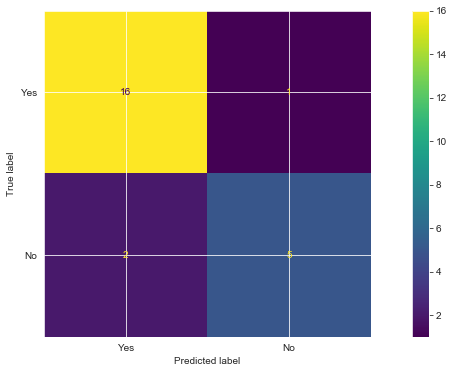

In [2937]:

plot_confusion_matrix(lgr, x_test, y_test, display_labels = ["Yes","No"])
plt.show